# **Setup**

## Importing & Installing base packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# installing packages
!pip install demoji
!pip install pyLDAvis
!pip install chart_studio
!pip install gensim

  Using cached demoji-1.1.0-py3-none-any.whl (42 kB)
     |████████████████████████████████| 1.7 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=7d2c1b25ae143b69ff2d515d199d25202033b8a51db0c984e132f6d01d5bb082
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=8d3fdbf27e61e637e7a3702c392d6064cb006bdcb8a817d722239a979b9ad596
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
%matplotlib inline
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tqdm
from tqdm import tqdm

# spacy
# SpaCy is the fastest framework for training NLP models. 
# Although it is less flexible and supports fewer languages than NLTK, it’s much easier to use. 
# SpaCy also provides built-in word vector and uses deep learning for training some models.
import spacy
from spacy.lang.en import English

# gensim
# One of the top choices for topic modeling in Python is Gensim, 
# a robust library that provides a suite of tools for implementing LSA, LDA, and other topic modeling algorithms.
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore


# nltk
# NLTK is a framework that is widely used for topic modeling and text classification. 
# It provides plenty of corpora and lexical resources to use for training models, plus different tools for processing text, 
# including tokenization, stemming, tagging, parsing, and semantic reasoning. 
# Although NLTK can be quite slow and difficult to use, it’s the most well-known and complete NLP library out there.
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer

# pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')
import logging
logging.raiseExceptions = False

lemma = nltk.wordnet.WordNetLemmatizer()
nltk.download('wordnet')
def lemmatize(text):
    return lemma.lemmatize(text)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Importing cleaned dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Cleaning/cleaned_ceo_tweets_with_tokens.csv')
#del df['Unnamed: 0']
df
df.tail(50)

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
5638,@sundarpichai,9911164273,2010-03-03 05:22:43,RT @elatable: Welcome Picnik! http://blog.picn...,1,0,RT Welcome Picnik,"['welcome', 'picnik']"
5639,@sundarpichai,9911114727,2010-03-03 05:21:10,http://news.yahoo.com/s/space/20100302/sc_spac...,1,3,That was one powerful quake,"['one', 'powerful', 'quake']"
5640,@sundarpichai,9515165621,2010-02-23 06:34:54,Puts the tiger woods incident in perspective. ...,0,3,Puts the tiger woods incident in perspective,"['put', 'tiger', 'wood', 'incident', 'perspect..."
5641,@sundarpichai,8799275526,2010-02-08 06:28:43,Pepsi avoids Superbowl. We run an ad there. Wh...,0,2,Pepsi avoids Superbowl We run an ad there What...,"['pepsi', 'avoids', 'superbowl', 'run', 'ad', ..."
5642,@sundarpichai,8381802315,2010-01-29 20:03:24,"Thanks Bill and Melinda Gates, this is great t...",0,2,Thanks Bill and Melinda Gates this is great to...,"['thanks', 'bill', 'melinda', 'gate', 'great',..."
5643,@sundarpichai,8133865898,2010-01-24 02:40:42,@peterchane simon singh fermat's last theorem ...,0,2,simon singh fermats last theorem just reading it,"['simon', 'singh', 'fermat', 'last', 'theorem'..."
5644,@sundarpichai,7444549601,2010-01-06 15:51:13,Back in bay area after a whirlwind 3 weeks thr...,1,2,Back in bay area after a whirlwind weeks thro...,"['back', 'bay', 'area', 'whirlwind', 'week', '..."
5645,@sundarpichai,6984306323,2009-12-24 02:00:14,Great to see Mixerlabs acquisition by Twitter....,0,3,Great to see Mixerlabs acquisition by Twitter ...,"['great', 'see', 'mixerlabs', 'acquisition', '..."
5646,@sundarpichai,6477226015,2009-12-08 22:36:28,"Mac, Linux and Extensions too....big day for C...",0,3,Mac Linux and Extensions toobig day for Chrome,"['mac', 'linux', 'extension', 'toobig', 'day',..."
5647,@sundarpichai,6457582596,2009-12-08 07:19:43,DARPA challenge solved in 9 hours!! http://www...,0,2,DARPA challenge solved in hours,"['darpa', 'challenge', 'solved', 'hour']"




```
# This is formatted as code
```

## Helper functions

In [ ]:
import ast
from pprint import pprint
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import ldamodel

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

## Initialising Dataset and Variables

In [ ]:
tokens = df.tokens.values.tolist()
tokens = [ast.literal_eval(x) for x in tokens]
bigram = bigrams(tokens)
bigram = [bigram[tweet] for tweet in tokens]
dictionary = corpora.Dictionary(bigram)
dictionary.filter_extremes(no_below = 10, no_above = 0.35)
dictionary.compactify()
corpus = [dictionary.doc2bow(t) for t in bigram]

df['tokens'] = df.apply(lambda row:  row['tokens'].strip('[]').replace('"', '').replace(' ', '').split(',')   , axis=1)

# **Creating a Base Model**

In [ ]:
# Instantiating a Base LDA model 
base_model = ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=5, random_state = 2022)

In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

# Create Topics
topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
congrats new team year great see android next game http

------ Topic 1 ------
help new will today proud cloud people future better ha

------ Topic 2 ------
new today have u out weve can great just year

------ Topic 3 ------
day u will thank today one community thought time world

------ Topic 4 ------
thanks great today support story important customer work io excited



In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=bigram, 
                                   dictionary=dictionary, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -6.721685062605795

Coherence Score:  0.29738735545382583


In [ ]:
# Topic Distance Visualization
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.198047  0.061575       1        1  22.725501
0      0.120235  0.071364       2        1  21.606275
2     -0.108417  0.022748       3        1  20.598214
3      0.035177 -0.255424       4        1  18.657538
4      0.151053  0.099737       5        1  16.412472, topic_info=         Term        Freq       Total Category  logprob  loglift
106    thanks  324.000000  324.000000  Default  30.0000  30.0000
85   congrats  158.000000  158.000000  Default  29.0000  29.0000
515      help  277.000000  277.000000  Default  28.0000  28.0000
418   android  109.000000  109.000000  Default  27.0000  27.0000
255       day  222.000000  222.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
75      first   44.003915  143.940517   Topic5  -4.7923   0.6220
220         u   50.345352  267.195312   Topic5  -4.6576   0.1381
640      live   31.302740   66.494090   Topic5  -5.1328   1.0537
82       will   34.497886  296.812838   Topic5  -5.0356  -0.3451
165       see   33.233499  203.496645   Topic5  -5.0730  -0.0050

[327 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
869       3  0.951094   accessible
923       2  0.915763  achievement
810       5  0.944584      advance
59        1  0.563474           ai
59        2  0.038073           ai
...     ...       ...          ...
98        2  0.508690         year
98        3  0.287702         year
98        4  0.062544         year
70        4  0.980212          yes
910       5  0.989760      youtube

[578 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5])

# **Hyper-Parameter Tuning**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

## Tuning 1: Grid Search


In [ ]:
# making lemmatization tokens a string again
df = pd.read_csv('/content/drive/MyDrive/Data Cleaning/cleaned_ceo_tweets_with_tokens.csv')
df['lemmas_back_to_text'] = df['tokens'].apply(lambda x: " ".join(map(str,ast.literal_eval(x))))
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df['lemmas_back_to_text'])

# Define search params
search_params = {'n_components': [5, 10, 15, 20, 25], 'learning_decay': [.5, .7, .9]}

# init the model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid = search_params)

# Do the grid serach
model.fit(data_vectorized)


GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -105781.91016656991
Model Perplexity:  4042.7643128654263


Grid search optimizes based on the complexity of the model and would automatically choose the model with least complexity. However, we think it would be better it the model is chosen based on coherence score. Hence, we have done hyperparameter tuning for individual parameters instead.

## Tuning 2: Individual Hyperparameter tuning 


Optimum number of topics

In [ ]:
coherence = []
for k in range(5,150,5):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=k, 
               id2word = dictionary, passes=10, decay = 0.5, random_state = 2022,
               iterations=200, chunksize = 1000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(
         model=ldamodel, texts=bigram,
         dictionary=dictionary, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))


Round: 5
Round: 10
Round: 15
Round: 20
Round: 25
Round: 30
Round: 35
Round: 40
Round: 45
Round: 50
Round: 55
Round: 60
Round: 65
Round: 70
Round: 75
Round: 80
Round: 85
Round: 90
Round: 95
Round: 100
Round: 105
Round: 110
Round: 115
Round: 120
Round: 125
Round: 130
Round: 135
Round: 140
Round: 145


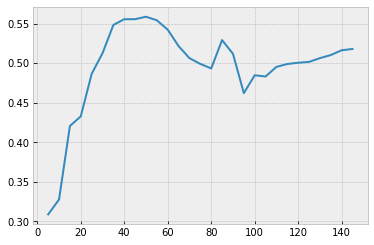

In [ ]:
num_topics_list = [x[0] for x in coherence]
score = [x[1] for x in coherence]
plt.plot(num_topics_list,score)

In [ ]:
curr_bestmodel = Lda(corpus, num_topics=40, 
            id2word = dictionary, passes=10, decay = 0.5, random_state = 2022,
            iterations=200, chunksize = 1000, eval_every = None)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(curr_bestmodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7     -0.001942  0.002898       1        1  3.618848
13     0.134158 -0.003606       2        1  3.410980
2     -0.086968  0.028038       3        1  3.142568
30     0.066264  0.013902       4        1  3.100915
35    -0.252840  0.109361       5        1  3.095486
28     0.080594 -0.013624       6        1  3.032546
21    -0.193841 -0.193639       7        1  3.025411
11    -0.061807  0.000079       8        1  3.002577
22    -0.084462 -0.156918       9        1  2.932592
24     0.086774 -0.080123      10        1  2.890534
0     -0.100164  0.093407      11        1  2.865061
10     0.023376  0.053182      12        1  2.862271
25     0.044678 -0.039003      13        1  2.831390
32     0.186276 -0.012826      14        1  2.817160
33    -0.051260 -0.293912      15        1  2.702935
20     0.012748  0.063399      16        1  2.563201
5     -0.131087  0.090944      17        1  2.538085
9     -0.112962  0.109819      18        1  2.514671
8      0.058390  0.031978      19        1  2.501372
6      0.005392 -0.082365      20        1  2.487087
17     0.119914  0.020841      21        1  2.458388
27     0.060351  0.032980      22        1  2.448632
14     0.065490  0.029337      23        1  2.400197
3     -0.095139  0.103252      24        1  2.365516
15    -0.028572 -0.002207      25        1  2.331014
19    -0.047360  0.037224      26        1  2.284538
38     0.017779 -0.225667      27        1  2.273230
26     0.049486  0.024567      28        1  2.228708
16    -0.014169  0.091945      29        1  2.214297
34     0.119981  0.016988      30        1  2.214186
37    -0.079551 -0.168890      31        1  2.196208
23     0.044751  0.022494      32        1  2.152986
29     0.084109  0.016630      33        1  2.130564
36     0.136789  0.036942      34        1  2.113359
4     -0.040114  0.066236      35        1  1.985076
1     -0.056363  0.077700      36        1  1.946776
18     0.040788  0.022417      37        1  1.727070
31     0.034339  0.007520      38        1  1.587526
12     0.080889  0.031813      39        1  1.507665
39    -0.114716  0.036887      40        1  1.498374, topic_info=         Term        Freq       Total Category  logprob  loglift
7       today  442.000000  442.000000  Default  30.0000  30.0000
150       new  518.000000  518.000000  Default  29.0000  29.0000
106    thanks  315.000000  315.000000  Default  28.0000  28.0000
123     great  305.000000  305.000000  Default  27.0000  27.0000
220         u  258.000000  258.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
12        one    0.028804  189.560914  Topic40  -9.7301  -4.5912
113      many    0.028804  113.930208  Topic40  -9.7301  -4.0820
297       use    0.028804   54.095876  Topic40  -9.7301  -3.3372
17      world    0.028804  169.395020  Topic40  -9.7301  -4.4787
927  applying    0.028804   25.879963  Topic40  -9.7301  -2.5999

[1376 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
630      32  0.866760        ability
325      21  0.928605           able
670       4  0.963791     accelerate
580       7  0.971833         access
594      19  0.948305  accessibility
...     ...       ...            ...
777      19  0.207094          youth
777      20  0.724829          youth
910      21  0.980902        youtube
627       2  0.938181             yr
0        39  0.843333            yup

[1150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 14, 3, 31, 36, 29, 22, 12, 23, 25, 1, 11, 26, 33, 34, 21, 6, 10, 9, 7, 18, 28, 15, 4, 16, 20, 39, 27, 17, 35, 38, 24, 30, 37, 5, 2, 19, 32, 13, 40])

From the above, num topic = 40 seems to have alot of overlap. Hence, we fix the number of topics to be 8.

In [ ]:
curr_bestmodel = Lda(corpus, num_topics=8, 
            id2word = dictionary, passes=10, decay = 0.5, random_state = 2022,
            iterations=200, chunksize = 1000, eval_every = None)

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(curr_bestmodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.033323 -0.012612       1        1  15.976949
1     -0.226055  0.153743       2        1  15.300999
5     -0.164235  0.082016       3        1  12.877882
7      0.080148  0.128169       4        1  12.847129
6     -0.074252 -0.044908       5        1  11.680610
2      0.179437  0.005026       6        1  10.932192
4     -0.046395 -0.368361       7        1  10.500832
3      0.284674  0.056926       8        1   9.883408, topic_info=          Term        Freq       Total Category  logprob  loglift
106     thanks  342.000000  342.000000  Default  30.0000  30.0000
150        new  510.000000  510.000000  Default  29.0000  29.0000
515       help  268.000000  268.000000  Default  28.0000  28.0000
255        day  223.000000  223.000000  Default  27.0000  27.0000
49       thank  167.000000  167.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
737  celebrate   38.047360   62.559481   Topic8  -4.4305   1.8170
2          big   35.813929   83.866219   Topic8  -4.4910   1.4634
132      story   34.013379   76.896462   Topic8  -4.5426   1.4986
40        time   38.735634  177.412139   Topic8  -4.4126   0.7926
20         but   30.919521  101.484703   Topic8  -4.6380   1.1258

[396 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
670       2  0.971735  accelerate
580       5  0.978625      access
531       4  0.128646      across
531       6  0.861931      across
682       6  0.945454      action
...     ...       ...         ...
70        8  0.985698         yes
643       3  0.951864   yesterday
241       4  0.957307         yet
374       8  0.954416       young
910       5  0.982567     youtube

[518 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 8, 7, 3, 5, 4])

Optimal number of passes

In [ ]:
no_passes = []
for k in range(5, 45):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=10, 
               id2word = dictionary, passes=k, decay = 0.7, random_state = 2022,
               iterations=200, chunksize = 1000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(
         model=ldamodel, texts=bigram,
         dictionary=dictionary, coherence='c_v')   
                                                
    no_passes.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44


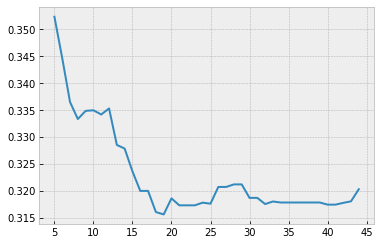

In [ ]:
num_passes_list = [x[0] for x in no_passes]
score_passes = [x[1] for x in no_passes]
plt.plot(num_passes_list,score_passes)

Optimal Decay Value

In [ ]:
no_decay = []
for k in [0.5,0.7,0.9]:
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=10, 
               id2word = dictionary, passes=12, decay = k, random_state = 2022,
               iterations=200, chunksize = 1000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(
         model=ldamodel, texts=bigram,
         dictionary=dictionary, coherence='c_v')   
                                                
    no_decay.append((k,cm.get_coherence()))

Round: 0.5
Round: 0.7
Round: 0.9


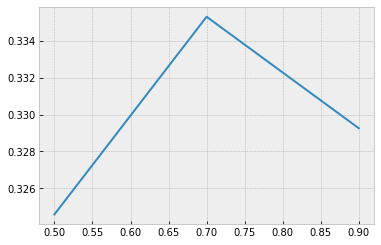

In [ ]:
num_decay_list = [x[0] for x in no_decay]
score_decay = [x[1] for x in no_decay]
plt.plot(num_decay_list,score_decay)

Optimal number of iterations

In [ ]:
no_iter = []
for k in range(50, 301, 10):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=10, 
               id2word = dictionary, passes=12, decay =0.7, random_state = 2022,
               iterations=k, chunksize = 1000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(
         model=ldamodel, texts=bigram,
         dictionary=dictionary, coherence='c_v')   
                                                
    no_iter.append((k,cm.get_coherence()))

Round: 50
Round: 60
Round: 70
Round: 80
Round: 90
Round: 100
Round: 110
Round: 120
Round: 130
Round: 140
Round: 150
Round: 160
Round: 170
Round: 180
Round: 190
Round: 200
Round: 210
Round: 220
Round: 230
Round: 240
Round: 250
Round: 260
Round: 270
Round: 280
Round: 290
Round: 300


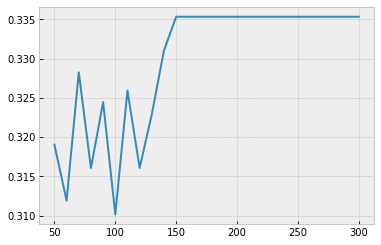

In [ ]:
num_iter_list = [x[0] for x in no_iter]
score_iter = [x[1] for x in no_iter]
plt.plot(num_iter_list,score_iter)

# Best Model

Best model has 8 topics, 5 passes, decay of 0.7 and 150 iterations

In [ ]:
best_model = ldamodel.LdaModel(corpus, num_topics=8, 
            id2word = dictionary, passes=5, decay =0.7, random_state = 2022,
            iterations=150, chunksize = 1000, eval_every = None)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.051147 -0.051141       1        1  15.975404
1     -0.199177 -0.096218       2        1  14.560526
5     -0.151752 -0.062148       3        1  13.070375
7      0.015422 -0.094871       4        1  13.022704
6     -0.003152  0.008526       5        1  11.923851
2      0.133741 -0.067545       6        1  11.303730
4     -0.054985  0.365326       7        1  10.550515
3      0.311050 -0.001930       8        1   9.592894, topic_info=         Term        Freq       Total Category  logprob  loglift
106    thanks  328.000000  328.000000  Default  30.0000  30.0000
515      help  265.000000  265.000000  Default  29.0000  29.0000
150       new  507.000000  507.000000  Default  28.0000  28.0000
49      thank  170.000000  170.000000  Default  27.0000  27.0000
407  everyone  151.000000  151.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
170    should   35.220540   57.354359   Topic8  -4.4779   1.8565
132     story   38.335432   78.934729   Topic8  -4.3931   1.6219
20        but   34.713377  102.041860   Topic8  -4.4924   1.2659
2         big   32.974521   85.572062   Topic8  -4.5438   1.3905
12        one   37.114820  187.347520   Topic8  -4.4255   0.7252

[451 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
670       2  0.945880   accelerate
580       5  0.977639       access
923       6  0.962065  achievement
531       4  0.452247       across
531       6  0.527622       across
...     ...       ...          ...
70        2  0.056118          yes
70        8  0.925954          yes
241       4  0.954194          yet
374       8  0.981049        young
910       5  0.977438      youtube

[736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 8, 7, 3, 5, 4])

In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in best_model.print_topics()]

# Create Topics
topics = [' '.join(t[0:15]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
chrome see android congrats year happy team new developer game

------ Topic 1 ------
help new cloud app technology today learn customer can future

------ Topic 2 ------
everyone working time around_world incredible ever just nice not thought

------ Topic 3 ------
day every will right platform impact life month laughing rolling_floor

------ Topic 4 ------
thanks great today first http w woman honor conversation u

------ Topic 5 ------
new team today excited service partnership one device great tool

------ Topic 6 ------
thank ai support community today heart business update work computer

------ Topic 7 ------
u out have world do way customer better can good



topic names:

* 0: software
* 1: cloud
* 2: work
* 3: humor
* 4: woman
* 5: partnetrship
* 6: community
* 7: improvement


In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
best_perplexity = best_model.log_perplexity(corpus)
print('\nPerplexity: ', best_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=best_model, texts=bigram, 
                                   dictionary=dictionary, coherence='c_v')
coherence_lda_model_best = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_best)


Perplexity:  -6.8188825454327775

Coherence Score:  0.3428581892377073


# Creating final topic modeling table

In [ ]:
train_vecs = []
num_topics = 8
for i in range(len(df.tokens)):
  top_topics = best_model.get_document_topics(corpus[i], minimum_probability=0.0)
  topic_vec = [top_topics[i][1] for i in range(num_topics)]
  train_vecs.append(topic_vec)
train_vec_df = pd.DataFrame(train_vecs)

**Append each tweet's score to the df and extract the most relevant topic**

In [ ]:
# Get assigned topic for each tweet based on max LDA score

# Helper functions

#For assigning which topic: Assigning based on Max value (most relevant word)

# get max value from a set of list
def get_max_topics(values):
    topics = []
    if len(list(set(values))) == 1:
        topics = values     
    else:
        topics.append(max(values))
    
    return topics

def assign_topics(col1, col2):
    if col1 in col2:
        return 1
    else:
        return 0

# Topics assigned based on eyeballing the bag of words provided by the LDA model
train_vec_df.columns = ['Software', 'Cloud', 'Work', 'Humor', 'Woman', 'Partnership', 'Community', 'Improvement']

# Merge with main df
df = pd.concat([df.reset_index(drop=True), train_vec_df.reset_index(drop=True)],axis=1)
df['all_topics'] = df[['Software', 'Cloud', 'Work', 'Humor', 'Woman', 'Partnership', 'Community', 'Improvement']].values.tolist()
df['max_topic'] = df['all_topics'].apply(lambda values: get_max_topics(values))

# change Topic columns to binary based on max score
for topic in train_vec_df.columns:
  df[topic] = df.apply(lambda x: assign_topics(x[topic],x['max_topic']), axis = 1)

df

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,all_topics,max_topic
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,['yup'],0,0,0,0,0,1,0,0,"[0.0625000074505806, 0.0625000074505806, 0.062...",[0.5624999403953552]
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,"['news', 'outlet', 'attempt', 'answer', 'quest...",0,0,0,1,0,0,0,0,"[0.01563563384115696, 0.01563355326652527, 0.0...",[0.5072869658470154]
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,So hard to find out whats going on in the worl...,"['hard', 'find', 'out', 'whats', 'going', 'wor...",0,0,0,0,0,0,0,1,"[0.010425619781017303, 0.010417606681585312, 0...",[0.927014172077179]
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,True careless negativity destruction is much h...,"['true', 'careless', 'negativity', 'destructio...",0,0,0,1,0,0,0,0,"[0.0416666679084301, 0.0416666679084301, 0.041...",[0.7083051800727844]
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"['sadly', 'true']",0,0,0,1,0,0,0,0,"[0.0625, 0.0625, 0.0625, 0.5625, 0.06250000745...",[0.5625]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"['happy', 'new', 'year']",1,0,0,0,0,0,0,0,"[0.7810937166213989, 0.0313032865524292, 0.031...",[0.7810937166213989]
5684,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying d browsing with Chrome it is awesome,"['enjoying', 'browsing', 'chrome', 'awesome']",1,0,0,0,0,0,0,0,"[0.7083125710487366, 0.0416836254298687, 0.041...",[0.7083125710487366]
5685,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"['thinking', 'abt', 'twittering']",0,0,1,0,0,0,0,0,"[0.0625000074505806, 0.0625000074505806, 0.562...",[0.5624999403953552]
5686,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying a rainy day in beijing clears out all...,"['enjoying', 'rainy', 'day', 'beijing', 'clear...",0,0,0,0,0,0,0,1,"[0.04173312708735466, 0.04169205576181412, 0.0...",[0.7080380916595459]


In [ ]:
df.to_csv('/content/drive/My Drive/Topic Modelling/topic_modeling.csv')
